# Linear Binary Classification

In this notebook we will build binary classification model using logistic regression technique. **Linear** here refers to, where the data is separable by linear decision boundary.

## Outline

- [1 - Packages](#1)

- [2 - Dataset](#2)

- [3 - Linear Binary Classification Model](#3)
    - [3.1 Scikit-Learn Model](#3point1)
    - [3.2 Numpy Model](#3point2)

<a id="1"></a>
## 1 - Packages

Below are the packages/libraries that we are going to use in this notebook.

In [1]:
# Importing necessary packages/libraries
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from binary_classification_model import LogisticRegression_
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

<a id="2"></a>
## 2 - Dataset

The binary classification dataset that we are going to use is from [UCI-ML-REPO](https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik). The dataset is licensed under a [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/legalcode) (CC BY 4.0) license.

Let's fetch the dataset from ucimlrepo using `fetch_ucirepo` method, and get the overview of the dataset. 

In [2]:
# Fetching the dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

In [3]:
# Viewing the features data of the dataset
features_data = rice_cammeo_and_osmancik.data.features
features_data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


In [4]:
# Viewing the target data of the dataset
target_data = rice_cammeo_and_osmancik.data.targets
target_data

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo
...,...
3805,Osmancik
3806,Osmancik
3807,Osmancik
3808,Osmancik


In [5]:
# Looking for any missing/NaN values in a features data
features_data.isna().any()

Area                 False
Perimeter            False
Major_Axis_Length    False
Minor_Axis_Length    False
Eccentricity         False
Convex_Area          False
Extent               False
dtype: bool

In [6]:
# Looking for any missing/NaN values in a target data
target_data.isna().any()

Class    False
dtype: bool

In [7]:
# Looking for class distribution in target data
np.unique(target_data, return_counts=True)

(array(['Cammeo', 'Osmancik'], dtype=object), array([1630, 2180]))

So we have a cleaned dataset with not heavily imbalanced class distribution, let's make it ready for building our model. We will first convert the dataset into numpy arrays making the target variable `Cammeo` and `Osmancik` into form of `1` and `0`, and then splitting the dataset into training, cross-validation and testing sets.

In [8]:
# Converting the data into numpy arrays
X = features_data.to_numpy()
Y = np.where(target_data == "Cammeo", 1, 0)

print(f"X.shape: {X.shape} & Y.shape: {Y.shape}")

X.shape: (3810, 7) & Y.shape: (3810, 1)


In [9]:
# Splitting the dataset into training (60%) and temp (40%)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)

# Splitting the temp data into cross-validation (50%) and test (50%)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

print(f"Training Set Size: {X_train.shape}")
print(f"Cross-Validation Set Size: {X_cv.shape}")
print(f"Test Set Size: {X_test.shape}")

Training Set Size: (2286, 7)
Cross-Validation Set Size: (762, 7)
Test Set Size: (762, 7)


<a id="3"></a>
## 3 - Linear Binary Classifcation Model

<a id="3point1"></a>
### 3.1 Scikit-Learn Model

Since we do not know whether the data is suitable for our goal (_e.g. is the data separable by linear dicision boundary_), we will first build few models linear and non-linear's using scikit-learn, and after determining the optimal model hopefully the linear binary classification model, we will then build our custom model using numpy.

In [10]:
# Dictionary to store trained models with their polynomial degree as the key
models = {}

# Training models of (Degrees 1 to 5) -> (Degree 1 means linear model)
for degree in range(1, 6):
    print(f"Training model with polynomial degree {degree}")

    # Creating a pipeline with PolynomialFeatures + StandardScaler + LogisticRegression
    model_pipeline = Pipeline(
        steps=[
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("logistic_regression", LogisticRegression(max_iter=10000, penalty=None, random_state=42))
        ]
    )

    # Training the model
    model_pipeline.fit(X_train, Y_train.flatten())

    # Evaluating on training and cross-validation sets 
    train_accuracy = accuracy_score(Y_train, model_pipeline.predict(X_train).reshape(-1, 1))
    cv_accuracy = accuracy_score(Y_cv, model_pipeline.predict(X_cv).reshape(-1, 1))

    print(f"Train Accuracy: {train_accuracy:.4f}, Cross-Validation Accuracy: {cv_accuracy:.4f}\n")

    # Storing the trained model with the polynomial degree as the key
    models[f"degree_{degree}"] = model_pipeline

Training model with polynomial degree 1


Train Accuracy: 0.9322, Cross-Validation Accuracy: 0.9370

Training model with polynomial degree 2
Train Accuracy: 0.9318, Cross-Validation Accuracy: 0.9370

Training model with polynomial degree 3
Train Accuracy: 0.9283, Cross-Validation Accuracy: 0.9331

Training model with polynomial degree 4
Train Accuracy: 0.9339, Cross-Validation Accuracy: 0.9344

Training model with polynomial degree 5
Train Accuracy: 0.9309, Cross-Validation Accuracy: 0.9318



The results indicate that the dataset is **linearly separable**, as increasing the polynomial degree does not significantly improve performance on training data. A higher-degree polynomial model would typically introduce more complexity, which could lead to overfitting, but in this case, the results remain stable across different degrees.

Thus, the **degree 1 model** is the best choice, as it provides the **highest efficiency with the same level of performance** as higher-degree models. And the dataset is suitable for our goal.

Now let's evaluate the optimal model on testing set.

In [11]:
# Retrieving the optimal model
model = models["degree_1"]
model

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('logistic_regression',
                 LogisticRegression(max_iter=10000, penalty=None,
                                    random_state=42))])

In [13]:
# Making prediction on test data and calculating the accuracy
test_accuracy = accuracy_score(Y_test, model.predict(X_test).reshape(-1, 1))
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9265


The test accuracy is close to train and validation accuracy. This completes our goal of building a linear binary classification model using scikit-learn library.

<a id="3point2"></a>
### 3.2 Numpy Model

Now we will build linear binary classification model using numpy library. We will use vectorized approach for efficient implementation.

The linear binary classification model also called logistic regression can be represented as:

$$ Z = f(X) = X \cdot W + B \tag{1} $$  
$$ \hat{Y} = \sigma(Z) = \frac{1}{1 + e^{-Z}} \tag{2} $$  

where,  
- $Z$ is the linear combination of input features, weights, and bias.  
- $X$ is the input feature matrix.  
- $W$ is the weight matrix.  
- $B$ is the bias matrix.
- $\hat{Y}$ is the predicted probability matrix.
- $\sigma(Z)$ is the sigmoid activation function whose input is $Z$.  

The cost function for our model will be **Binary Cross-Entropy (Log Loss)**:

$$ C = J(W, B) = -\frac{1}{m} * \sum \left[Y * \ln(\hat{Y}) + (1 - Y) * \ln(1 - \hat{Y}) \right] \tag{3} $$

where,  
- $m$ is the number of training examples.  
- $Y$ is the actual target variable matrix.  

To train our model, we will use **gradient descent**, updating weights and bias as follows:

$$ W = W - \alpha * \frac{\partial J(W, B)}{\partial W} \tag{4} $$
$$ B = B - \alpha * \frac{\partial J(W, B)}{\partial B} \tag{5} $$

where,  
$$ \frac{\partial J(W, B)}{\partial W}  = \frac{1}{m} * X^{T} \cdot (\hat{Y} - Y) \tag{6} $$  
$$ \frac{\partial J(W, B)}{\partial B}  = \frac{1}{m} * \sum (\hat{Y} - Y) \tag{7} $$  

_**NOTE:** All the code implementation of the above is in `binary_classification_model.py` file_.

In [14]:
# Initializing the numpy model and training it for 10000 iterations
numpy_model = LogisticRegression_(iterations=10000, alpha=10)
numpy_model.fit(X_train, Y_train)

Iteration: 1/10000
Cost: 0.6931471803599453

Iteration: 2/10000
Cost: 0.4621045303885311

Iteration: 3/10000
Cost: 0.41202656231171014

Iteration: 4/10000
Cost: 0.3729721390557468

Iteration: 5/10000
Cost: 0.34190083388356973

Iteration: 6/10000
Cost: 0.3163853002680273

Iteration: 7/10000
Cost: 0.29492295761052423

Iteration: 8/10000
Cost: 0.27663457356954746

Iteration: 9/10000
Cost: 0.26100137226459025

Iteration: 10/10000
Cost: 0.24763319463238323

Iteration: 11/10000
Cost: 0.2361747528931383

Iteration: 12/10000
Cost: 0.2263031872782222

Iteration: 13/10000
Cost: 0.21776098952554312

Iteration: 14/10000
Cost: 0.21037174996128707

Iteration: 15/10000
Cost: 0.20402880584587765

Iteration: 16/10000
Cost: 0.19867112746861076

Iteration: 17/10000
Cost: 0.19425674102965243

Iteration: 18/10000
Cost: 0.19073853387519754

Iteration: 19/10000
Cost: 0.18804657308457262

Iteration: 20/10000
Cost: 0.1860808595713184

Iteration: 21/10000
Cost: 0.18471612208355212

Iteration: 22/10000
Cost: 0.1

Text(0, 0.5, 'Cost')

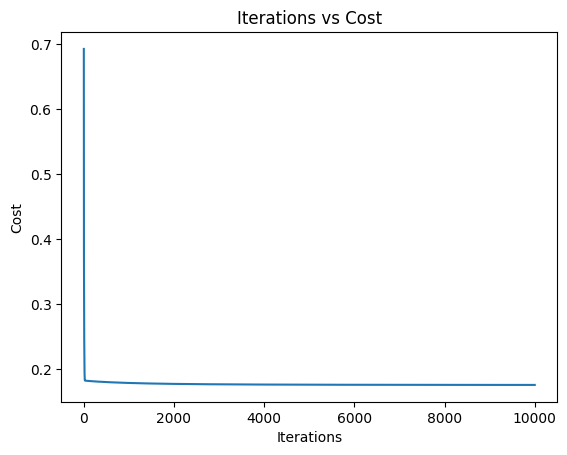

In [16]:
# Plotting the training history of the model
history = np.array(numpy_model.history)

plt.plot(history[:, 0], history[:, 1])
plt.title("Iterations vs Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")

As we can see in the above plot that cost has been minimized, thus resulting in optimal parameters for the model. Now we are ready to make prediction. We will make prediction on all sets and compare the results with scikit-learn model.

In [18]:
# Making prediction on all sets and calculating the accuracy
train_accuracy_ = accuracy_score(Y_train, (numpy_model.make_prediction(X_train) >= 0.5).astype(int))
cv_accuracy_ = accuracy_score(Y_cv, (numpy_model.make_prediction(X_cv) >= 0.5).astype(int))
test_accuracy_ = accuracy_score(Y_test, (numpy_model.make_prediction(X_test) >= 0.5).astype(int))

print(f"Train Accuracy: {train_accuracy_:.4f}"),
print(f"Cross-Validation Accuracy: {cv_accuracy_:.4f}")
print(f"Test Accuracy: {test_accuracy_:.4f}")

Train Accuracy: 0.9313
Cross-Validation Accuracy: 0.9370
Test Accuracy: 0.9265


The results match with the scikit-learn model, this marks the completion of building linear binary classification model using numpy library.